# Creating a run

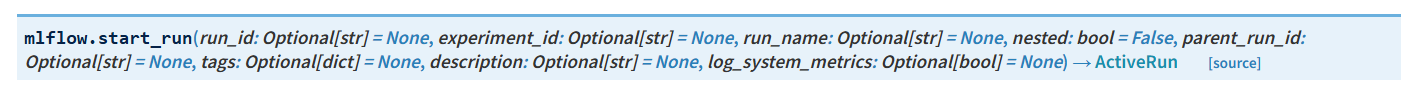

<b>Method1:-inside the Default Experiment

In [6]:
from pathlib import Path
import mlflow

mlruns_path = Path(r'E:\linux backup\desktop\mlflow_for_ml_dev_master\mlruns')
mlflow.set_tracking_uri(uri=mlruns_path.as_uri())


In [7]:

run = mlflow.start_run()

In [8]:
print(type(run).__name__)

ActiveRun


In [9]:
run.info.to_proto()

run_uuid: "3e8232537aec4d3bbb903abf8ab15eb8"
experiment_id: "0"
run_name: "ambitious-lamb-601"
user_id: "pande"
status: RUNNING
start_time: 1755700511568
artifact_uri: "file:///E:/linux%20backup/desktop/mlflow_for_ml_dev_master/mlruns/0/3e8232537aec4d3bbb903abf8ab15eb8/artifacts"
lifecycle_stage: "active"
run_id: "3e8232537aec4d3bbb903abf8ab15eb8"

In [10]:
run.data.to_dictionary()

{'metrics': {},
 'params': {},
 'tags': {'mlflow.runName': 'ambitious-lamb-601',
  'mlflow.source.name': 'c:\\Users\\pande\\miniconda3\\envs\\env_for_GenAi\\Lib\\site-packages\\ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.user': 'pande'}}

In [11]:
# Simulating a machine Learning run

# Machine learing code here
# ...

# logging some random parameters
mlflow.log_param("param1", 5)
mlflow.log_param("param2", 5)
mlflow.log_param("param3", 5)

# logging some random metrics
mlflow.log_metric("metric1", 15)
mlflow.log_metric("metric2", 52)
mlflow.log_metric("metric3", 35)

<b>get the updated run object

In [12]:
# Get the updated run object. This method will return the updated run object
run = mlflow.get_run(run_id=run.info.run_id)

In [13]:
run.info.to_proto()

run_uuid: "3e8232537aec4d3bbb903abf8ab15eb8"
experiment_id: "0"
run_name: "ambitious-lamb-601"
user_id: "pande"
status: RUNNING
start_time: 1755700511568
artifact_uri: "file:///E:/linux%20backup/desktop/mlflow_for_ml_dev_master/mlruns/0/3e8232537aec4d3bbb903abf8ab15eb8/artifacts"
lifecycle_stage: "active"
run_id: "3e8232537aec4d3bbb903abf8ab15eb8"

In [14]:
run.data.to_dictionary()

{'metrics': {'metric1': 15.0, 'metric2': 52.0, 'metric3': 35.0},
 'params': {'param1': '5', 'param2': '5', 'param3': '5'},
 'tags': {'mlflow.runName': 'ambitious-lamb-601',
  'mlflow.source.name': 'c:\\Users\\pande\\miniconda3\\envs\\env_for_GenAi\\Lib\\site-packages\\ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.user': 'pande'}}

In [15]:
#starting a new run without ending the previous one will throw an error
try:
    run2 = mlflow.start_run()
except Exception as e:
    print(e)

Run with UUID 3e8232537aec4d3bbb903abf8ab15eb8 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True


In [18]:
run2.info.to_proto()

run_uuid: "f4b0fac2cf78442f8ee8257827b1cc18"
experiment_id: "0"
run_name: "colorful-mouse-170"
user_id: "pande"
status: RUNNING
start_time: 1755700628683
artifact_uri: "file:///E:/linux%20backup/desktop/mlflow_for_ml_dev_master/mlruns/0/f4b0fac2cf78442f8ee8257827b1cc18/artifacts"
lifecycle_stage: "active"
run_id: "f4b0fac2cf78442f8ee8257827b1cc18"

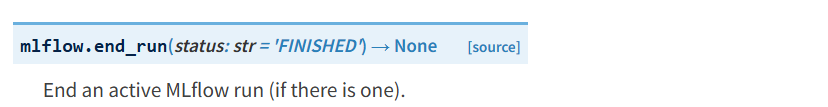

In [19]:
# To start a new run, first end the current run with mlflow.end_run().
mlflow.end_run()

In [20]:
#starting a new run
run2 = mlflow.start_run()
print(run2.info.lifecycle_stage)

active


In [21]:
run.info.to_proto()

run_uuid: "3e8232537aec4d3bbb903abf8ab15eb8"
experiment_id: "0"
run_name: "ambitious-lamb-601"
user_id: "pande"
status: RUNNING
start_time: 1755700511568
artifact_uri: "file:///E:/linux%20backup/desktop/mlflow_for_ml_dev_master/mlruns/0/3e8232537aec4d3bbb903abf8ab15eb8/artifacts"
lifecycle_stage: "active"
run_id: "3e8232537aec4d3bbb903abf8ab15eb8"

In [22]:
mlflow.end_run()

# <b><u><i>Most important thing

# Using "run" object as context manager

In [23]:
with mlflow.start_run() as run: 
    print("WITHIN RUN CONTEXT")
    print("Run Status: ",run.info.status)

    # logging some random parameters
    mlflow.log_param("param1", 5)
    mlflow.log_param("param2", 5)
    mlflow.log_param("param3", 5)

    # logging some random metrics
    mlflow.log_metric("metric1", 15)
    mlflow.log_metric("metric2", 52)
    mlflow.log_metric("metric3", 35)


print("OUTSIDE RUN CONTEXT")
# Get the updated run object. This method will return the updated run object
run = mlflow.get_run(run_id=run.info.run_id)

print("Run Status: ",run.info.status)
print(run.data.to_dictionary())


WITHIN RUN CONTEXT
Run Status:  RUNNING
OUTSIDE RUN CONTEXT
Run Status:  FINISHED
{'metrics': {'metric1': 15.0, 'metric2': 52.0, 'metric3': 35.0}, 'params': {'param1': '5', 'param2': '5', 'param3': '5'}, 'tags': {'mlflow.runName': 'worried-chimp-604', 'mlflow.source.name': 'c:\\Users\\pande\\miniconda3\\envs\\env_for_GenAi\\Lib\\site-packages\\ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.user': 'pande'}}


# Creating run using Client

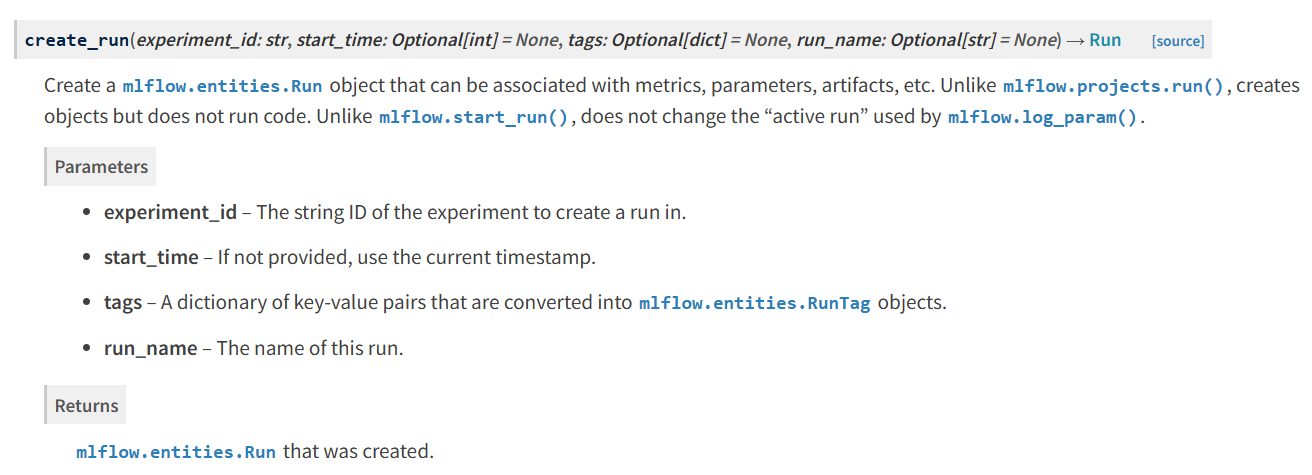

In [24]:
client = mlflow.MlflowClient()

# create a run in the default experiment
run = client.create_run(experiment_id="0") 

print(type(run).__name__)

Run


In [25]:
run.info.to_proto()

run_uuid: "daa3fa5071a743288369cdb71a551e30"
experiment_id: "0"
run_name: "bustling-shrike-959"
user_id: "unknown"
status: RUNNING
start_time: 1755700921676
artifact_uri: "file:///E:/linux%20backup/desktop/mlflow_for_ml_dev_master/mlruns/0/daa3fa5071a743288369cdb71a551e30/artifacts"
lifecycle_stage: "active"
run_id: "daa3fa5071a743288369cdb71a551e30"

In [26]:
mlflow.log_metric("random-metric", 10)

In [27]:
mlflow.end_run()

In [28]:
# Associating metrics and parameters with the run
mlflow.log_metric(key="m1", value=1.5, run_id=run.info.run_id)

# log_param does not accept run_id as parameter
try:
    mlflow.log_param(key="p1", value=2.5, run_id=run.info.run_id)
except Exception as e:
    print(e)

log_param() got an unexpected keyword argument 'run_id'


## Ending a  with the client

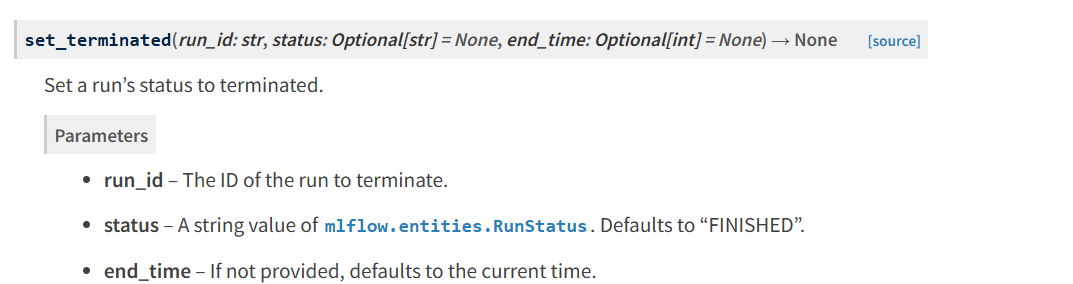

In [29]:
client = mlflow.MlflowClient()

client.set_terminated(run_id = run.info.run_id)

# retrieve the run object to verify that the run is terminated
run = mlflow.get_run(run.info.run_id)
print(run.info.status)

FINISHED


## Using run as context manager.

In [30]:
run = client.create_run(experiment_id="0")
print(type(run).__name__)
with mlflow.start_run(run_id=run.info.run_id) as run:
    print(type(run).__name__)
    print("WITHIN RUN CONTEXT")
    print("Run Name: ", run.info.run_name)
    print("Run Status: ",run.info.status)
    mlflow.log_param("p1", 1)
    mlflow.log_metric("m1", 2)


run = client.get_run(run.info.run_id)
print("OUTSIDE CONTEXT")
print("Run Name: ", run.info.run_name)
print("Run Status: ",run.info.status)
print("Run Data")
print(run.data.to_dictionary())



Run
ActiveRun
WITHIN RUN CONTEXT
Run Name:  intrigued-lynx-906
Run Status:  RUNNING
OUTSIDE CONTEXT
Run Name:  intrigued-lynx-906
Run Status:  FINISHED
Run Data
{'metrics': {'m1': 2.0}, 'params': {'p1': '1'}, 'tags': {'mlflow.runName': 'intrigued-lynx-906'}}
